# Plan
### Project goals
- Create a README file containing detailed plans, data dictionary, and initial hypotheses
- Create documented files to acquire, clean, and prepare Telco dataset for processing by classification ML algorithms.
- Create and test two hypotheses using statistical tests to reject or approve null hypotheses.
- Use ML algorithms to create a model that best predicts customer churn on both in and out-of-sample data vs a baseline.
- Choose the model that best fits the data to use on the test dataset.
- Document processes, findings, and takeaways in a final draft Jupyter Notebook
- Present on my final Jupyter Notebook, giving a high-level overview of the process used to create the model of best fit


### Executive Summary:
- All models I created preformed better than baseline on both in and out-of-sample data
- After testing 3 models against eachother found that my <a href="https://github.com/Marley-C-Robinson-99/Classification-Project/blob/main/telco_decision_tree.pdf">Decision Tree</a> model preformed better than Random Forrest and kNN with an accuracy of 79.6% on test data
- After some exploration of the data, engineered features such as `mtm_fiber` to try and increase model accuracy

### Initial Hypothesis:
> $H_{i}$: Customers with Fiber Internet on the month-to-month contract churn much more frequently due to high monthly charges and tend to have lower monthly tenure

# Acquisition
> - Acquire uncleaned `telco_churn` dataset using <a href="https://github.com/Marley-C-Robinson-99/Classification-Project/blob/main/acquire.py">acquire.py</a> script
> - Garner basic understanding of dataset using functions such as shape, info, describe, and value_counts

#### Imports

In [2]:
# Importing neccessary libraries and modules
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from acquire import get_telco_data, summarize_df
from prepare import num_distributions, prep_telco, telco_split
import graphviz
from graphviz import Graph
import warnings
warnings.filterwarnings('ignore')
import explore

In [3]:
# Pull df from acquire.py and look at the first few entries using df.head()
unclean_telco = get_telco_data()
unclean_telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
internet_service_type_id,1,1,2,2,2
online_security,No,No,No,No,No


In [3]:
# High level summary of data including value_counts, dtypes, 
summarize_df(unclean_telco)

This dataframe has 7043 rows and 21 columns.
------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   objec

#### Pre-cleaning extrapolations
- Lots of variables need encoding and renaming
- Unneccesary columns such as `customer_id`
- See <a href="https://github.com/Marley-C-Robinson-99/Classification-Project#readme">README.md</a> for data dictionary that explains each variable
- Non-normal distributions for numeric categories.

# Preparation
> - Clean data using the <a href="https://github.com/Marley-C-Robinson-99/Classification-Project/blob/main/prepare.py">prepare.py</a> functions `prep_telco()`
>     - Renamed columns to increase understandability
>     - Removed duplicates and entries with empty(null) total_charges
>     - Created dummies for `internet_service_type_id`, `payment_type_id`, and `contract_type_id`

### Feature engineering
##### Created columns:
- `auto_bill`: customers who pay via bank and card
- `fbr_multi_line`: customers who have fiber internet and multiple phone lines
- `mtm_fiber`: customers who have fiber internet and month-to-month contract
- `partner_dependents`: customers with both a partner and dependents

In [4]:
# prep data using prepare.py script and output cleaned df
telco = prep_telco(get_telco_data())
telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
is_male,0,1,1,1,0
is_senior,0,0,0,1,1
has_partner,1,0,0,1,1
has_dependents,1,0,0,0,0
tenure,9,9,4,13,3
has_phone,1,1,1,1,1
has_multi_line,0,1,0,0,0
has_onl_sec,0,0,0,0,0
has_backup,1,0,0,1,0


# Exploration
> - Run statistical tests to evaluate any potential correllations using <a href="https://github.com/Marley-C-Robinson-99/Classification-Project/blob/main/explore.py">explore.py</a>
>     - Form hypotheses based upon statistical data
> - Utilize explore script stat tests to glean useful information from visualizations, p-values, frequency tables and cross-tabs
>     - Univariate and Bivariate tests
> - Test hypotheses using statistical tests such as chi squared and t-tests

## Univariate Stat Tests

In [6]:
# Listing columns to separate quantitative vars from categorical vars
telco.columns

Index(['customer_id', 'is_male', 'is_senior', 'has_partner', 'has_dependents',
       'tenure', 'has_phone', 'has_multi_line', 'has_onl_sec', 'has_backup',
       'has_dev_pro', 'has_tech_supp', 'has_tv_strm', 'has_mv_strm',
       'has_pprless_bill', 'monthly_charges', 'total_charges', 'has_churned',
       'payment_bank', 'payment_card', 'payment_e_check', 'payment_m_check',
       'internet_dsl', 'internet_fiber', 'internet_none', 'contract_m_to_m',
       'contract_one_year', 'contract_two_year', 'auto_bill', 'fbr_multi_line',
       'mtm_fiber', 'partner_dependents'],
      dtype='object')

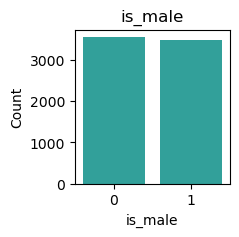

   is_male  Count  Percent
1        0   3549    50.47
0        1   3483    49.53
_________________________________________________________________


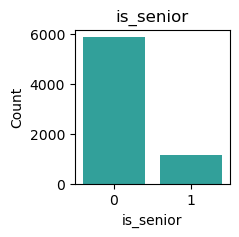

   is_senior  Count  Percent
0          0   5890    83.76
1          1   1142    16.24
_________________________________________________________________


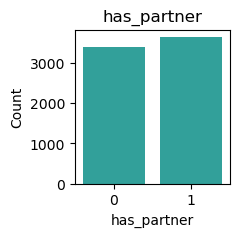

   has_partner  Count  Percent
0            1   3639    51.75
1            0   3393    48.25
_________________________________________________________________


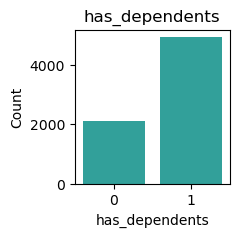

   has_dependents  Count  Percent
0               1   4933    70.15
1               0   2099    29.85
_________________________________________________________________


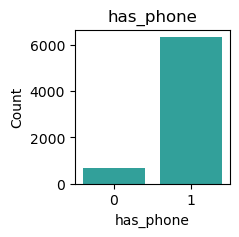

   has_phone  Count  Percent
1          1   6352    90.33
0          0    680     9.67
_________________________________________________________________


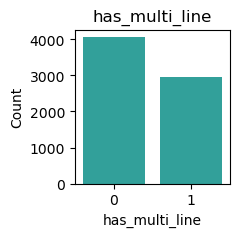

   has_multi_line  Count  Percent
0               0   4065    57.81
1               1   2967    42.19
_________________________________________________________________


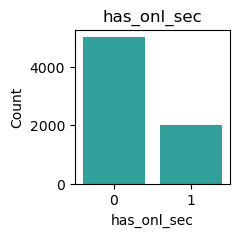

   has_onl_sec  Count  Percent
0            0   5017    71.35
1            1   2015    28.65
_________________________________________________________________


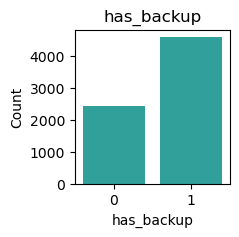

   has_backup  Count  Percent
0           1   4607    65.51
1           0   2425    34.49
_________________________________________________________________


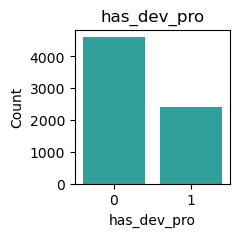

   has_dev_pro  Count  Percent
0            0   4614    65.61
1            1   2418    34.39
_________________________________________________________________


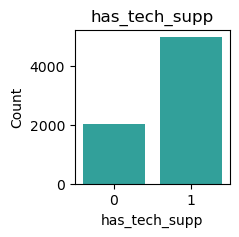

   has_tech_supp  Count  Percent
0              1   4992    70.99
1              0   2040    29.01
_________________________________________________________________


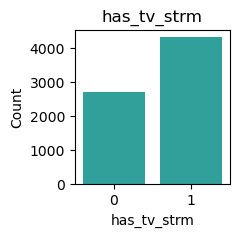

   has_tv_strm  Count  Percent
0            1   4329    61.56
1            0   2703    38.44
_________________________________________________________________


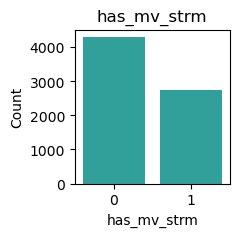

   has_mv_strm  Count  Percent
0            0   4301    61.16
1            1   2731    38.84
_________________________________________________________________


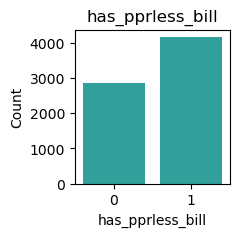

   has_pprless_bill  Count  Percent
1                 1   4168    59.27
0                 0   2864    40.73
_________________________________________________________________


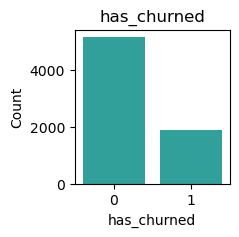

   has_churned  Count  Percent
0            0   5163    73.42
1            1   1869    26.58
_________________________________________________________________


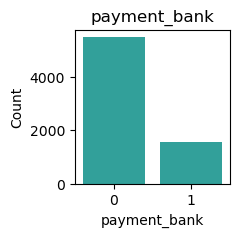

   payment_bank  Count  Percent
0             0   5490    78.07
1             1   1542    21.93
_________________________________________________________________


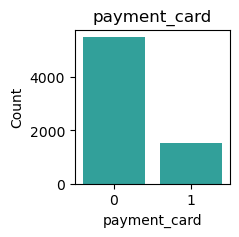

   payment_card  Count  Percent
0             0   5511    78.37
1             1   1521    21.63
_________________________________________________________________


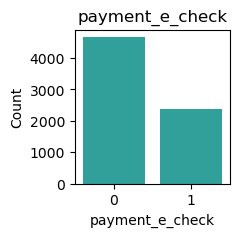

   payment_e_check  Count  Percent
0                0   4667    66.37
1                1   2365    33.63
_________________________________________________________________


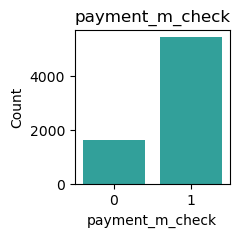

   payment_m_check  Count  Percent
0                1   5428    77.19
1                0   1604    22.81
_________________________________________________________________


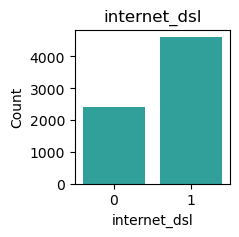

   internet_dsl  Count  Percent
0             1   4616    65.64
1             0   2416    34.36
_________________________________________________________________


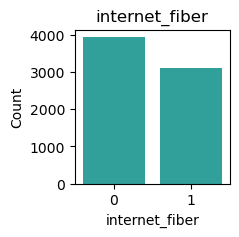

   internet_fiber  Count  Percent
0               0   3936    55.97
1               1   3096    44.03
_________________________________________________________________


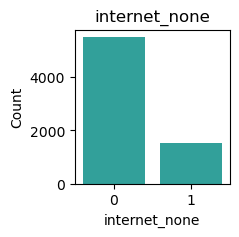

   internet_none  Count  Percent
0              0   5512    78.38
1              1   1520    21.62
_________________________________________________________________


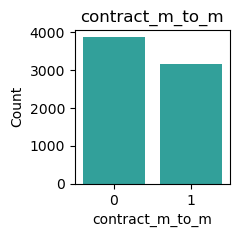

   contract_m_to_m  Count  Percent
1                0   3875    55.11
0                1   3157    44.89
_________________________________________________________________


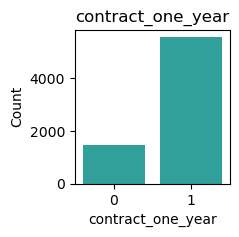

   contract_one_year  Count  Percent
0                  1   5560    79.07
1                  0   1472    20.93
_________________________________________________________________


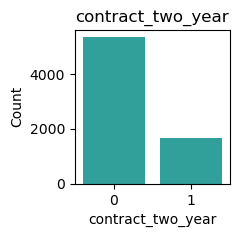

   contract_two_year  Count  Percent
0                  0   5347    76.04
1                  1   1685    23.96
_________________________________________________________________


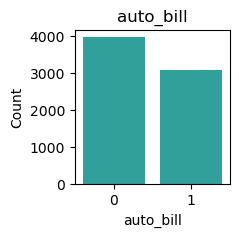

   auto_bill  Count  Percent
0          0   3969    56.44
1          1   3063    43.56
_________________________________________________________________


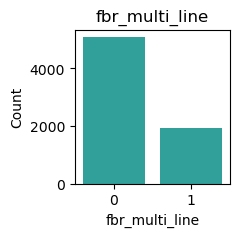

   fbr_multi_line  Count  Percent
0               0   5094    72.44
1               1   1938    27.56
_________________________________________________________________


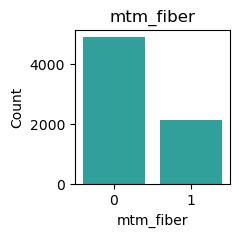

   mtm_fiber  Count  Percent
0          0   4904    69.74
1          1   2128    30.26
_________________________________________________________________


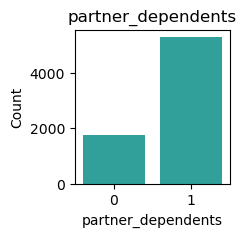

   partner_dependents  Count  Percent
0                   1   5292    75.26
1                   0   1740    24.74
_________________________________________________________________


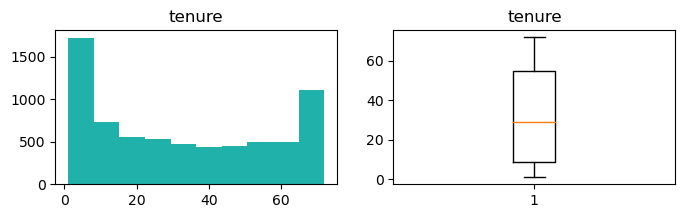

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


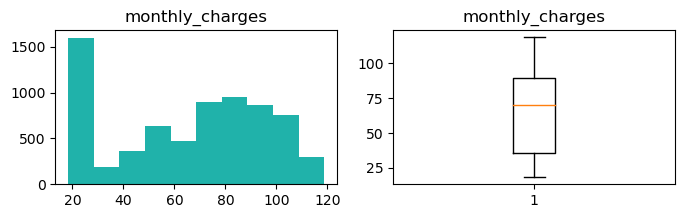

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: monthly_charges, dtype: float64


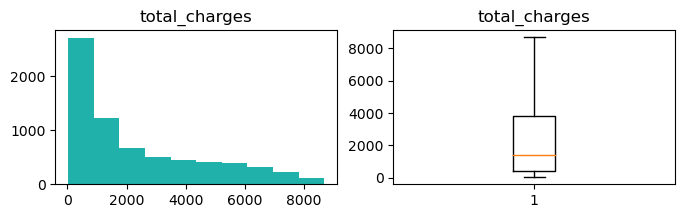

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_charges, dtype: float64


In [7]:
# Seperating cat and quant vars and running stat tests
cat_vars = ['is_male', 'is_senior', 'has_partner', 'has_dependents',
       'has_phone', 'has_multi_line', 'has_onl_sec', 'has_backup',
       'has_dev_pro', 'has_tech_supp', 'has_tv_strm', 'has_mv_strm',
       'has_pprless_bill', 'has_churned','payment_bank', 'payment_card',
       'payment_e_check', 'payment_m_check','internet_dsl', 'internet_fiber', 'internet_none', 'contract_m_to_m',
       'contract_one_year', 'contract_two_year', 'auto_bill', 'fbr_multi_line',
       'mtm_fiber', 'partner_dependents']

quant_vars = ['tenure','monthly_charges', 'total_charges']

explore.explore_univariate(telco, cat_vars, quant_vars)

#### Univariate Stat Test Takeaways
- 26.6% Have churned
    - Baseline will be based upon customers not churning
- Mean monthly charge is 64.8
- Mean total charge is 2316.8
- Mean tenure = 32.421786
- 43% of customers have a fiber internet plan

## Bivariate Stat Test

is_senior 
_____________________

         chi2       p-value  degrees of freedom
0  158.440816  2.479256e-36                   1

observed:
 has_churned     0     1   All
is_senior                    
0            4497  1393  5890
1             666   476  1142
All          5163  1869  7032

expected:
              0            1
0  4324.526451  1565.473549
1   838.473549   303.526451


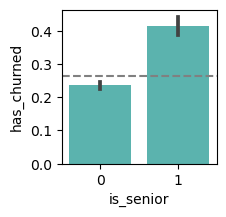


_____________________

has_multi_line 
_____________________

        chi2   p-value  degrees of freedom
0  11.086876  0.000869                   1

observed:
 has_churned        0     1   All
has_multi_line                  
0               3046  1019  4065
1               2117   850  2967
All             5163  1869  7032

expected:
              0            1
0  2984.584044  1080.415956
1  2178.415956   788.584044


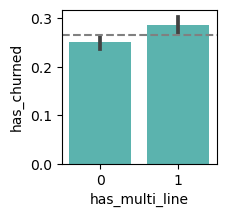


_____________________

has_pprless_bill 
_____________________

         chi2       p-value  degrees of freedom
0  256.874908  8.236203e-58                   1

observed:
 has_churned          0     1   All
has_pprless_bill                  
0                 2395   469  2864
1                 2768  1400  4168
All               5163  1869  7032

expected:
              0            1
0  2102.791809   761.208191
1  3060.208191  1107.791809


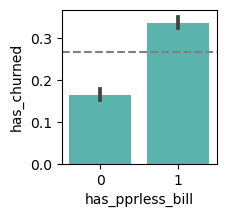


_____________________

payment_e_check 
_____________________

         chi2        p-value  degrees of freedom
0  637.588697  1.117802e-140                   1

observed:
 has_churned         0     1   All
payment_e_check                  
0                3869   798  4667
1                1294  1071  2365
All              5163  1869  7032

expected:
              0            1
0  3426.581485  1240.418515
1  1736.418515   628.581485


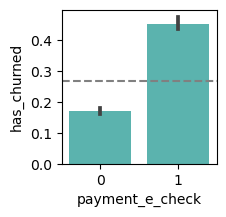


_____________________

mtm_fiber 
_____________________

          chi2        p-value  degrees of freedom
0  1226.206954  1.229838e-268                   1

observed:
 has_churned     0     1   All
mtm_fiber                    
0            4197   707  4904
1             966  1162  2128
All          5163  1869  7032

expected:
              0            1
0  3600.590444  1303.409556
1  1562.409556   565.590444


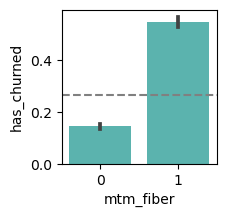


_____________________

contract_m_to_m 
_____________________

          chi2        p-value  degrees of freedom
0  1149.104315  7.023468e-252                   1

observed:
 has_churned         0     1   All
contract_m_to_m                  
0                2943   214  3157
1                2220  1655  3875
All              5163  1869  7032

expected:
              0            1
0  2317.916809   839.083191
1  2845.083191  1029.916809


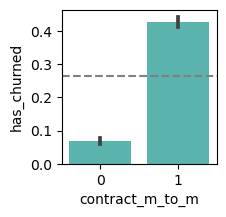


_____________________

auto_bill 
_____________________

         chi2       p-value  degrees of freedom
0  310.393406  1.792768e-69                   1

observed:
 has_churned     0     1   All
auto_bill                    
0            2590  1379  3969
1            2573   490  3063
All          5163  1869  7032

expected:
              0            1
0  2914.099403  1054.900597
1  2248.900597   814.099403


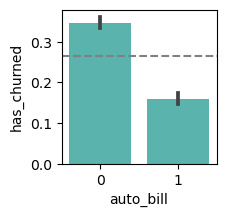


_____________________

fbr_multi_line 
_____________________

         chi2       p-value  degrees of freedom
0  230.713529  4.166150e-52                   1

observed:
 has_churned        0     1   All
fbr_multi_line                  
0               3992  1102  5094
1               1171   767  1938
All             5163  1869  7032

expected:
              0            1
0  3740.091297  1353.908703
1  1422.908703   515.091297


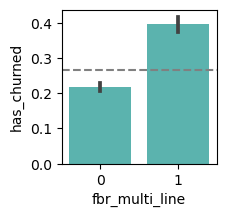


_____________________

partner_dependents 
_____________________

         chi2       p-value  degrees of freedom
0  177.490901  1.711115e-40                   1

observed:
 has_churned            0     1   All
partner_dependents                  
0                   3672  1620  5292
1                   1491   249  1740
All                 5163  1869  7032

expected:
             0           1
0  3885.46587  1406.53413
1  1277.53413   462.46587


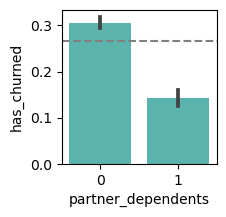


_____________________

tenure 
____________________



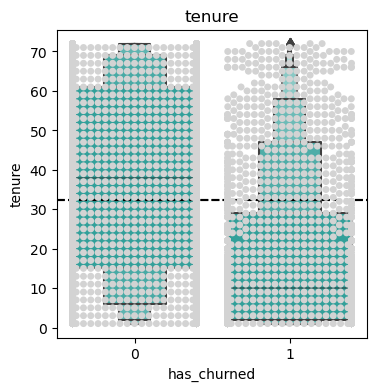

              count       mean        std  min   25%   50%   75%   max
has_churned                                                           
0            5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1            1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=7154668.0, pvalue=6.043046580882717e-211)

____________________

monthly_charges 
____________________



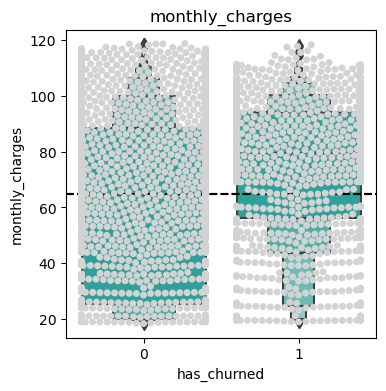

              count       mean        std    min    25%    50%     75%     max
has_churned                                                                   
0            5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1            1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3663498.5, pvalue=8.467195044548749e-54)

____________________

total_charges 
____________________



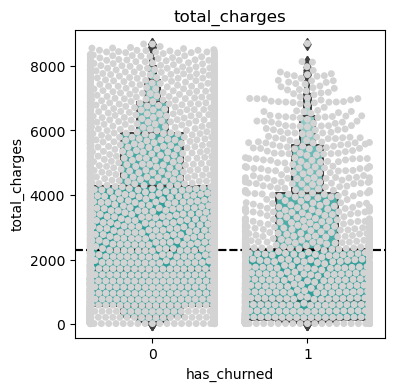

              count         mean          std    min      25%      50%  \
has_churned                                                              
0            5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
1            1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                  75%      max  
has_churned                     
0            4264.125  8672.45  
1            2331.300  8684.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=6288982.0, pvalue=1.9959848938845826e-84)

____________________



In [8]:
# Removed has_churned and non-target related vars from cat_vars
cat_vars = ['is_senior', 'has_multi_line', 'has_pprless_bill',
       'payment_e_check', 'mtm_fiber', 'contract_m_to_m',
       'auto_bill', 'fbr_multi_line', 'partner_dependents']

quant_vars = ['tenure','monthly_charges', 'total_charges']

explore.explore_bivariate(telco, 'has_churned', cat_vars, quant_vars)

#### Bivariate Stat Test Takeaways
- Demographic info:
    - `is_senior` is highly correllated with churn despite low number of observations
- Package info:
    - While having a phone is not correlated with churn, `has_multi_line` is moderately associated with churn
    - Having security 'add ons' such as online security, online backup, device protection, and tech support has an inverse effect on churn
    - `internet_fiber` is VERY highly correlated with churn
    - `fbr_multi_line` also very correlated with churn
- Billing info:
    - `has_pprless_bill` correlated highly with churn
    - All payment types aside from `payment_e_check` are inversely correlated with churn
    - `auto_bill` associated with customer retention
    - `contract_m_to_m` is extremely correlated to churn
- Those who churn more likely to have `tenure` less than 30
    - Mean `tenure` for those who have churned is 18
- High monthly charges associated with churn as well
    - Mean monthly charge for churned customers is 74 compared to 61 for not churned
    - Lowest quartile for churned customers more than double that of not churned

#### Choosing features

In [7]:
telco_explore = telco[['customer_id', 'has_churned', 'is_senior', 'has_pprless_bill',
       'mtm_fiber','auto_bill', 'fbr_multi_line', 'payment_e_check', 'contract_m_to_m',
       'total_charges', 'tenure', 'monthly_charges', 'payment_e_check', 'contract_two_year', 'internet_fiber']]

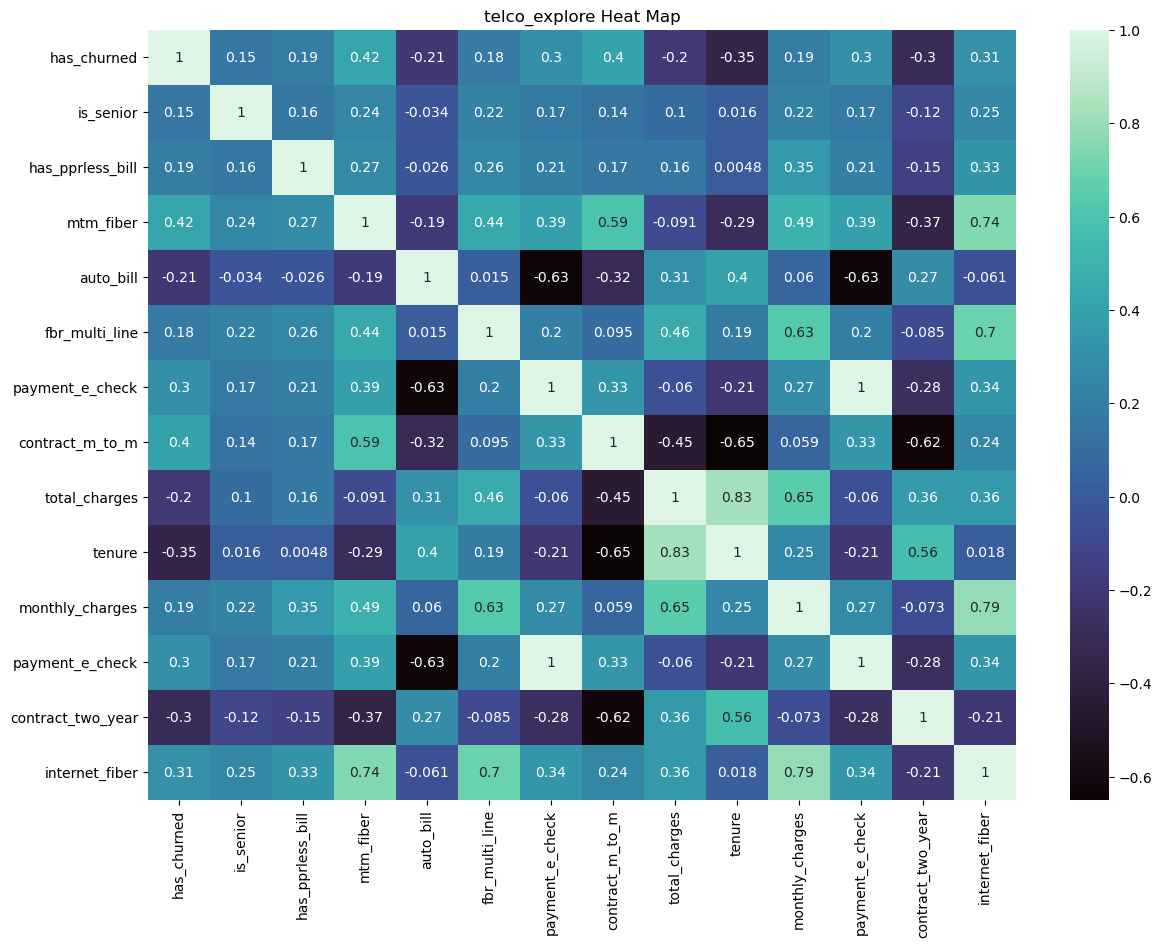

In [10]:
plt.rc('figure', figsize=(14, 10))
sns.heatmap(telco_explore.corr(), cmap='mako', annot = True)

plt.title('telco_explore Heat Map')
plt.show()

#### Heatmap Takeaways:
- `churn` highly correlated with:
    - Inverse correlation with `tenure`
    - `contract_m_to_m`
    - `payment_e_check`
    - `mtm_fiber`
- `tenure` correlated with:
    - `auto_bill`
    - `total_charges`
    - `contract_two_year`
    - Inverse correlation with `contract_m_to_m`
- `fbr_multi_line`, `mtm_fiber`, and `internet_fiber` all correlate to high `monthly_charges`

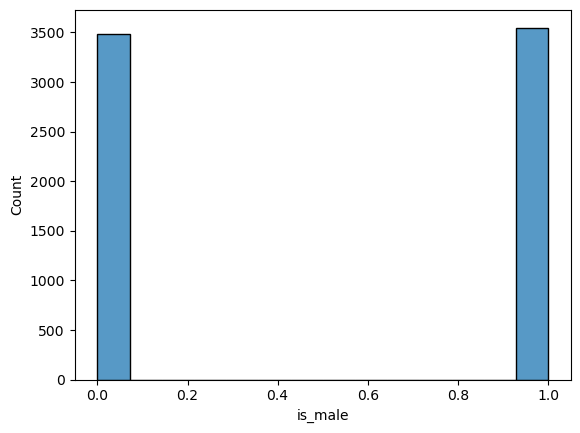

1    3549
0    3483
Name: is_male, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


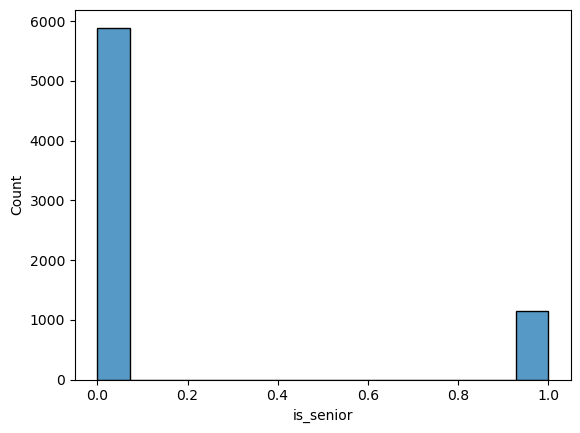

0    5890
1    1142
Name: is_senior, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


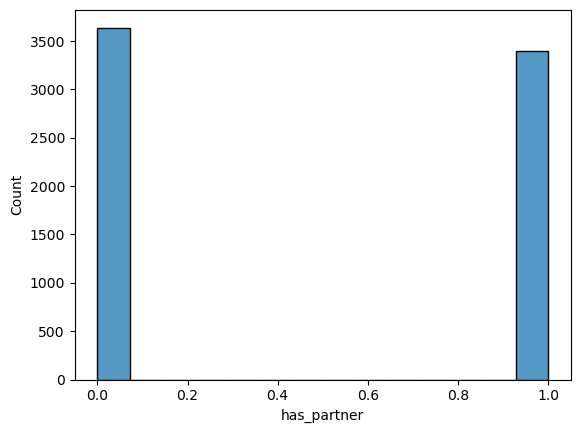

0    3639
1    3393
Name: has_partner, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


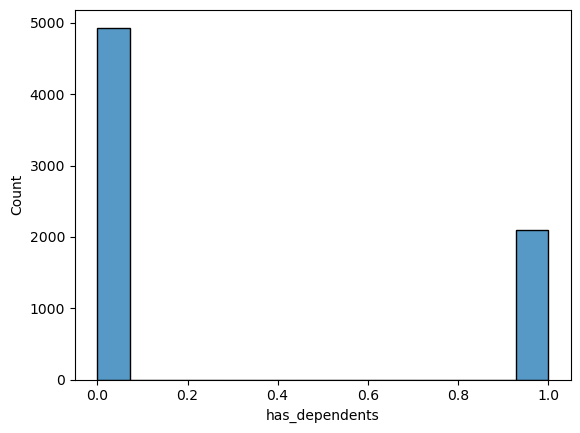

0    4933
1    2099
Name: has_dependents, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


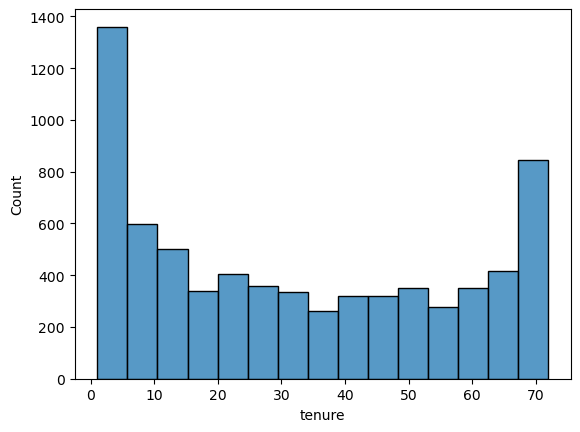

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


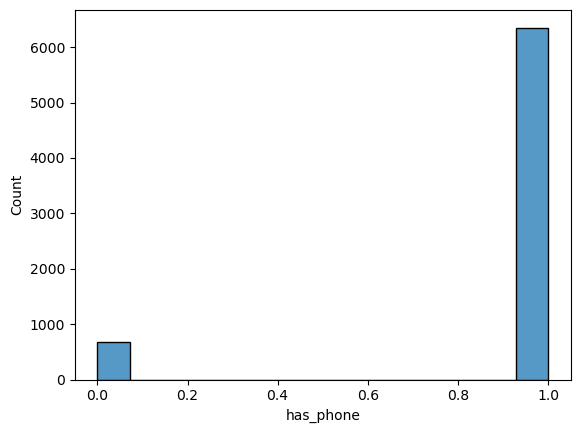

1    6352
0     680
Name: has_phone, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


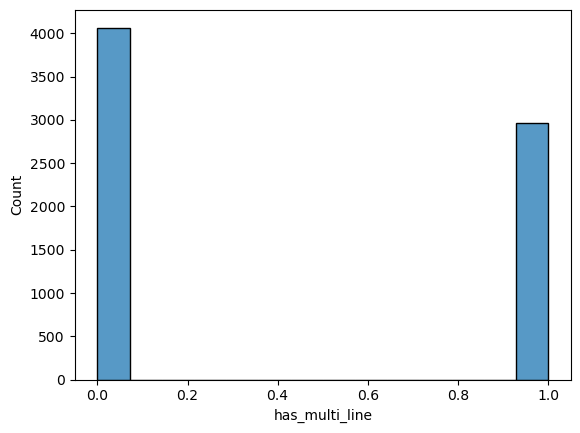

0    4065
1    2967
Name: has_multi_line, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


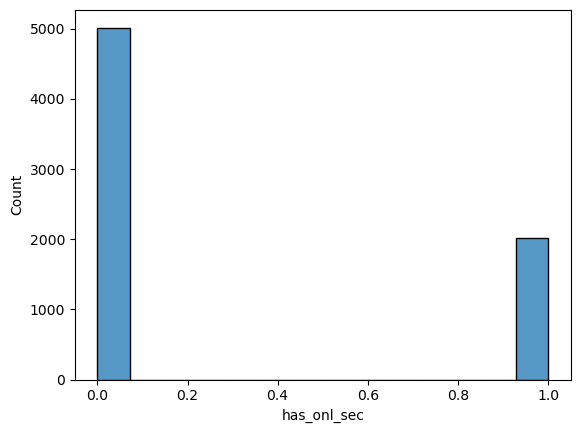

0    5017
1    2015
Name: has_onl_sec, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


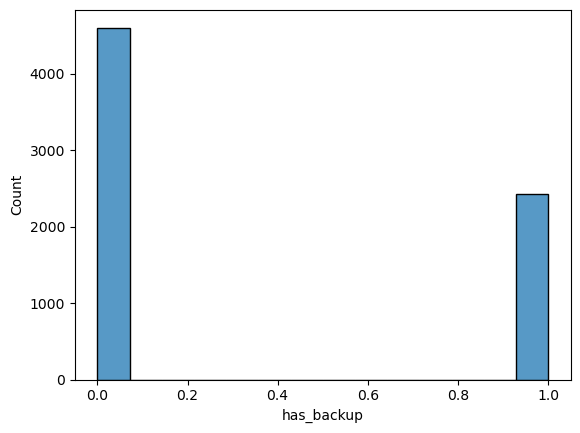

0    4607
1    2425
Name: has_backup, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


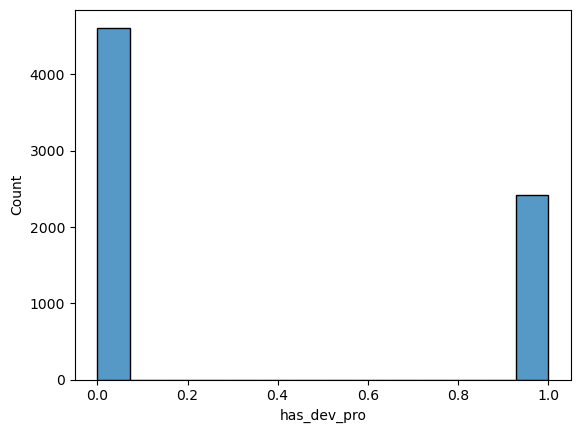

0    4614
1    2418
Name: has_dev_pro, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


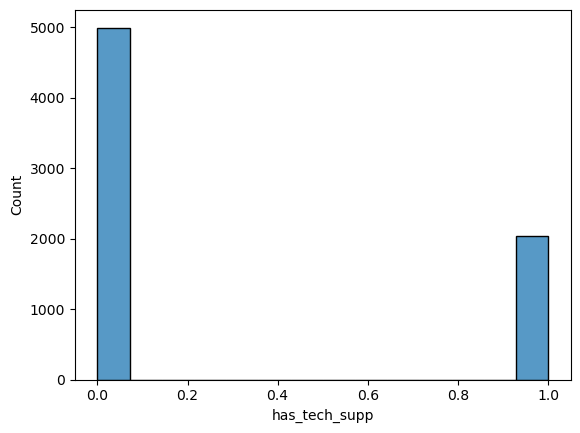

0    4992
1    2040
Name: has_tech_supp, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


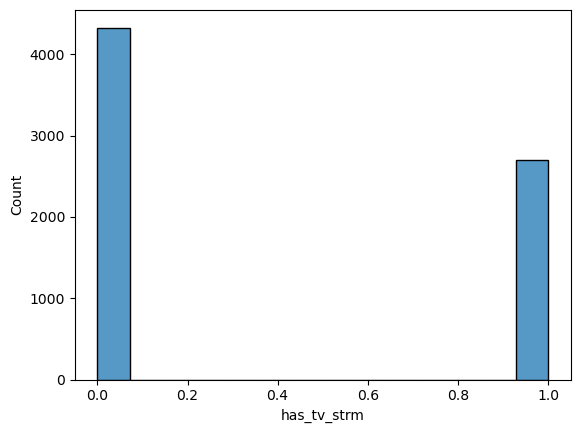

0    4329
1    2703
Name: has_tv_strm, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


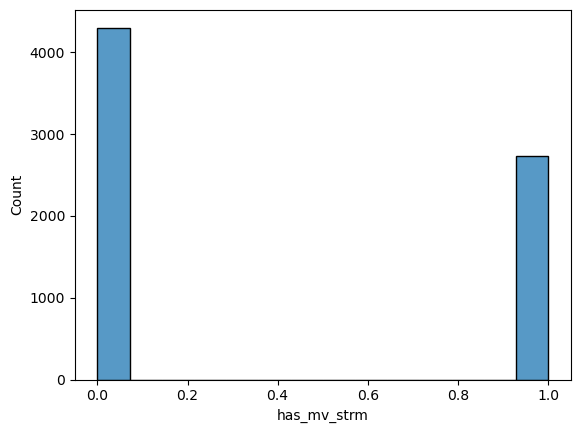

0    4301
1    2731
Name: has_mv_strm, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


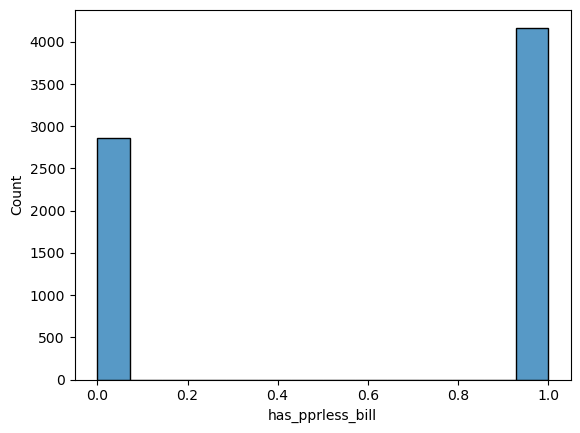

1    4168
0    2864
Name: has_pprless_bill, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


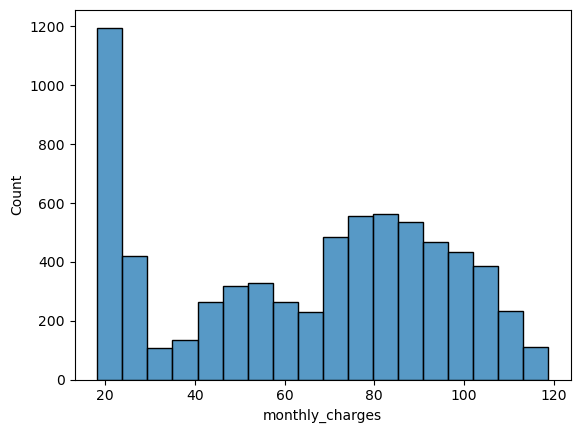

20.05     61
19.85     44
19.95     44
19.90     44
19.65     43
          ..
47.60      1
35.25      1
115.85     1
112.40     1
67.85      1
Name: monthly_charges, Length: 1584, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


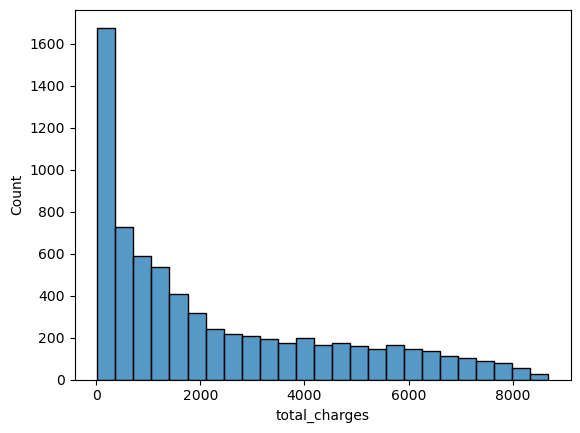

20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6530, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


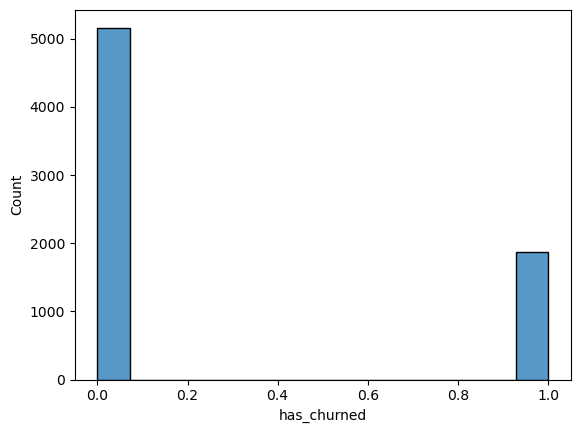

0    5163
1    1869
Name: has_churned, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


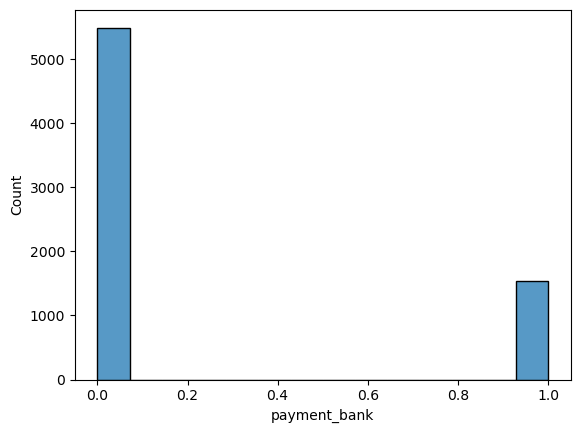

0    5490
1    1542
Name: payment_bank, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


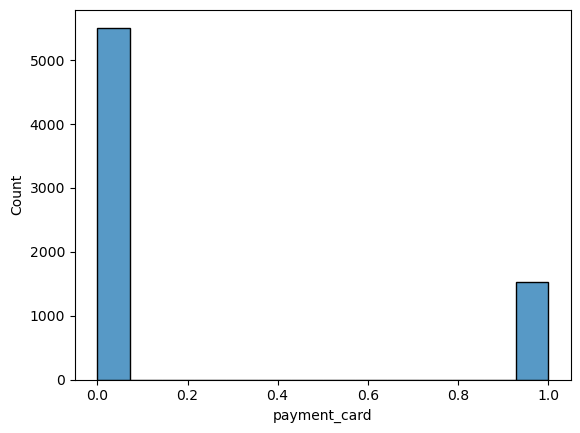

0    5511
1    1521
Name: payment_card, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


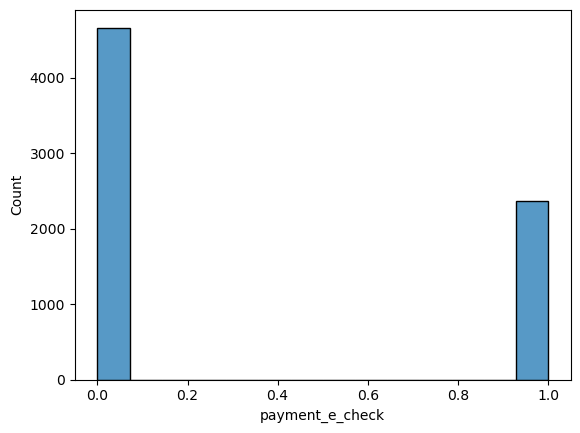

0    4667
1    2365
Name: payment_e_check, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


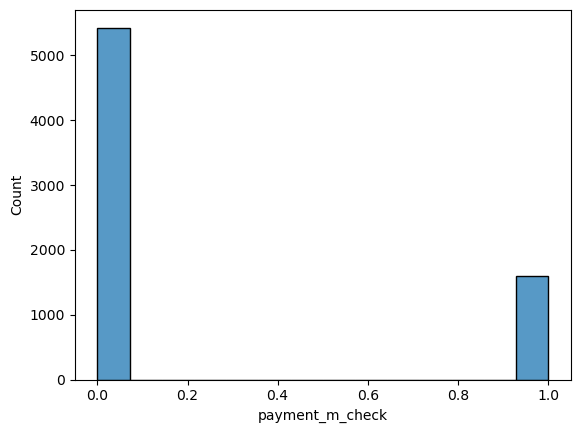

0    5428
1    1604
Name: payment_m_check, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


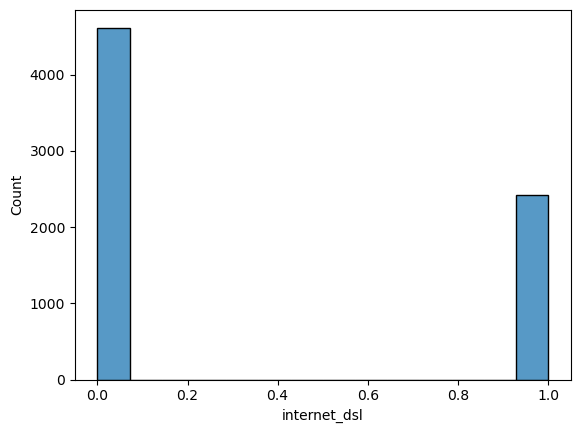

0    4616
1    2416
Name: internet_dsl, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


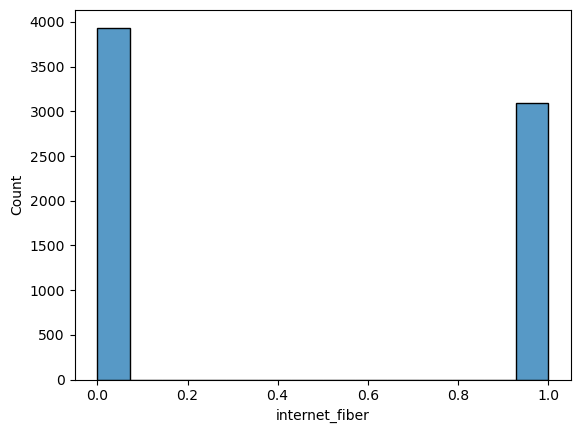

0    3936
1    3096
Name: internet_fiber, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


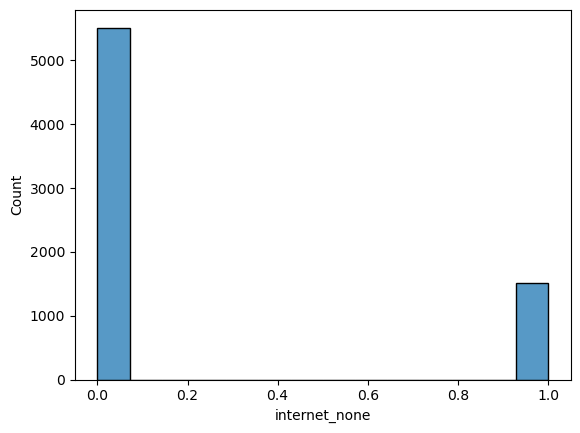

0    5512
1    1520
Name: internet_none, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


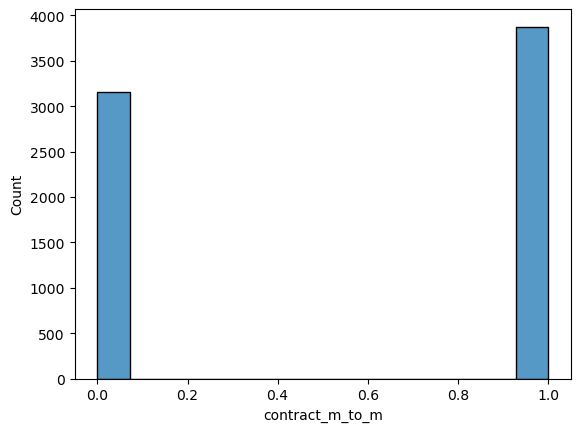

1    3875
0    3157
Name: contract_m_to_m, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


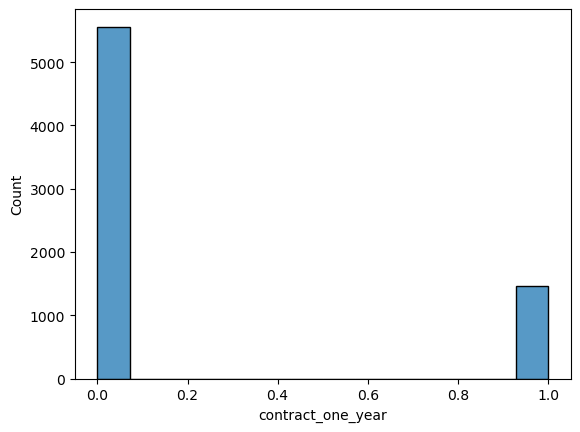

0    5560
1    1472
Name: contract_one_year, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


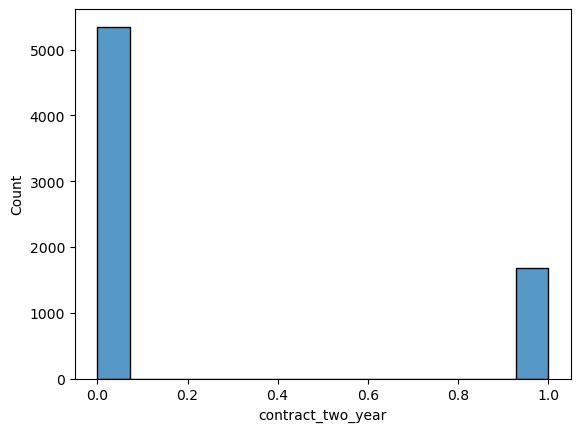

0    5347
1    1685
Name: contract_two_year, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


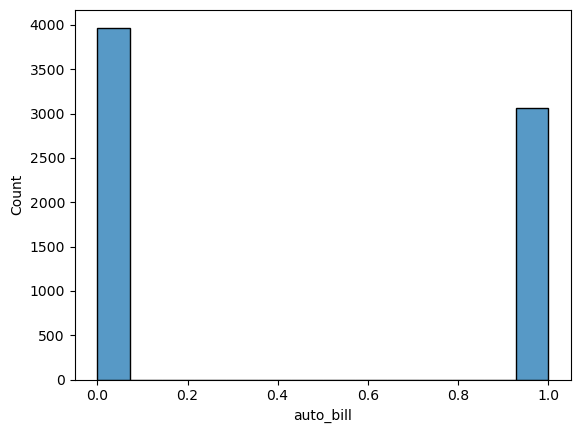

0    3969
1    3063
Name: auto_bill, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


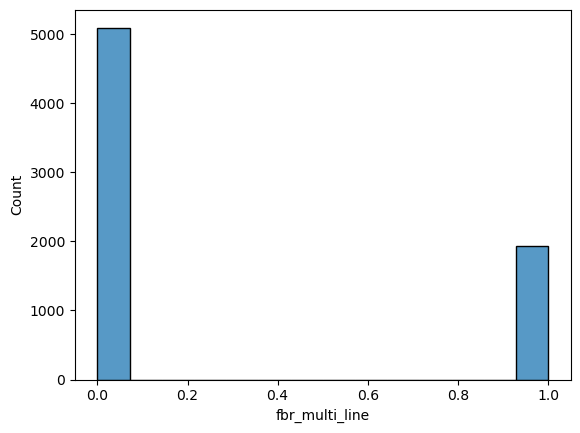

0    5094
1    1938
Name: fbr_multi_line, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


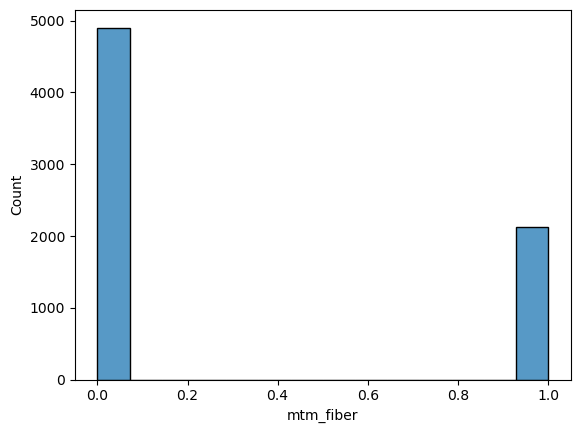

0    4904
1    2128
Name: mtm_fiber, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


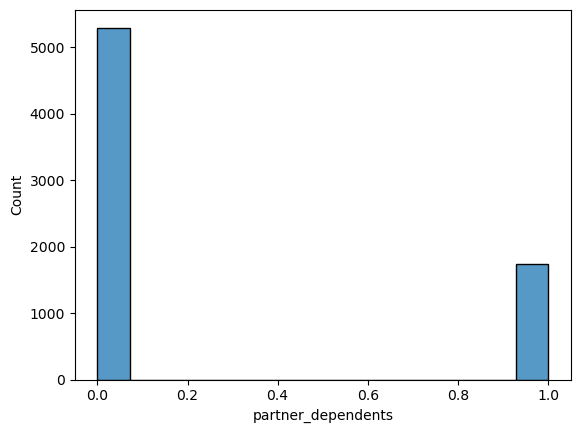

0    5292
1    1740
Name: partner_dependents, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


In [5]:
# Checking distributions
for col, vals in telco.iteritems():
    if telco[f'{col}'].dtype != object:
        print(telco[f'{col}'].value_counts(), sns.histplot(data = telco[f'{col}']), plt.show(),
              end = '\n------------------------------------\n')

#### Distribution Takeaways
- No continuos vars have normal distributrion
- For hypothesis testing t-tests we must use all non-parametric tests

## Hypothesis Testing
### Questions:
- $Q_{1}$: Do month-to-month fiber customers have lower monthly tenure than other fiber customers?
- $Q_{2}$: Do month-to-month fiber customers churn more than other month-to-month customers?

In [11]:
# Setting alpha
alpha = .05

### Question 1: Do month-to-month fiber customers have lower monthly tenure than other fiber customers?
- $H_{0}$: Month-to-month fiber customers have the same or higher monthly tenure compared to other fiber customers.
- $H_{a}$: Month-to-month fiber customers have the lower monthly tenure compared to other fiber customers.

In [12]:
# Using non-parametric tests
month_fiber = telco[telco.mtm_fiber == 1].tenure
int_fib = telco[telco['internet_fiber'] == 1].tenure

u, p = stats.mannwhitneyu(month_fiber, int_fib, alternative = 'less')
u, p

(2432093.0, 1.2051380890624521e-58)

In [13]:
# Simple if statement to check p against alpha to reject or accept null hypotheses
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

Reject Null Hypothesis


### Question 2: Do month-to-month fiber internet customers churn more than other month-to-month customers?
- $H_{0}$: Month-to-month fiber customers churn less than or equally compared to other month-to-month customers.
- $H_{a}$: Month-to-month fiber customers churn more than other month-to-month customers.

In [14]:
month_fiber = telco[telco.mtm_fiber == 1].has_churned
mtm_no_fib = telco[(telco.internet_fiber == 0) | (telco.contract_m_to_m == 1)].has_churned

u, p = stats.mannwhitneyu(month_fiber, mtm_no_fib, alternative = 'greater')
u, p

(8130304.0, 1.0534968163686097e-103)

In [15]:
if p < alpha:
    print("Reject Null hypothesis")
else:
    print("Fail to reject the Null hypothesis")

Reject Null hypothesis


### Hypothesis Testing Takeaways:
- Both questions had their $H_{0}$ rejected meaning:
    1. **Reject** $H_{0}$ -> Month-to-month fiber customers have the lower monthly tenure compared to other fiber customers.
    2. **Reject** $H_{0}$ -> Month-to-month fiber customers churn more than other month-to-month customers.

# Modeling
> - Check distributions of variables
> - Establish a baseline model to compare other models to
> - Create a combination of features to feed models
> - Train three different classification models
>     1. Decision Tree
>     2. Random Forrest
>     3. kNN
> - Compare each models accuracy to baseline accuracy
> - Compare model accuracy for in-set to out-of-set accuracy

#### Baseline:

In [16]:
# Establish baseline model, we know that only 26% have churned so we will set the baseline
# to predict for not churned

unclean_telco['baseline'] = 'No'
unclean_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,baseline
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.9,542.4,No,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,No
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,No
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,No


In [17]:
baseline = (unclean_telco.churn == unclean_telco.baseline).mean()
f'Baseline accuracy: {(unclean_telco.churn == unclean_telco.baseline).mean():.2%}'

'Baseline accuracy: 73.46%'

#### Baseline Accuracy: 73.46%

### Split Data

In [8]:
# Train, validate, test split on telco data with selected features
train, validate, test = telco_split(telco_explore)
train.shape, validate.shape, test.shape

((3937, 15), (1688, 15), (1407, 15))

In [9]:
# Setting X and y for each dataset
X_train, y_train = train.drop(columns= {'has_churned', 'customer_id'}), train.has_churned
X_validate, y_validate = validate.drop(columns={'has_churned', 'customer_id'}), validate.has_churned
X_test, y_test = test.drop(columns='has_churned'), test.has_churned

### Decision Tree

In [10]:
# Create and fit model
clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes = 16, random_state=123)
clf = clf.fit(X_train, y_train)

In [79]:
# Graphviz to vizualize my tree
dot_data = export_graphviz(clf, feature_names= X_train.columns,class_names=['not_churned','churned'], rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=False)

'telco_decision_tree.pdf'

In [57]:
# Predictions and prediction probabilities
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.87041565, 0.12958435],
       [0.87041565, 0.12958435],
       [0.95714286, 0.04285714],
       [0.64285714, 0.35714286],
       [0.87041565, 0.12958435]])

In [11]:
for i in range(0, len(list(X_train.columns))):
    print(X_train.columns[i], clf.feature_importances_[i])

is_senior 0.008098527737600869
has_pprless_bill 0.0
mtm_fiber 0.5849950403706616
auto_bill 0.0
fbr_multi_line 0.00869575641167891
payment_e_check 0.0
contract_m_to_m 0.0
total_charges 0.1481168411336623
tenure 0.17013511441098636
monthly_charges 0.05936820524837421
payment_e_check 0.0
contract_two_year 0.020590514687035686
internet_fiber 0.0


#### Evaluate:

In [58]:
# Evaluating model accuracy on train and validate datasets and comparing the difference in preformance

tscore = clf.score(X_train, y_train)
vscore = clf.score(X_validate, y_validate)

report = classification_report(y_train, y_pred, output_dict=True) #classfication report
print(clf)
print(pd.DataFrame(report))
print(f'Accuracy of decision tree classifier on train set: {tscore:.2%}\nAccuracy of random forest classifier on train set: {vscore:.2%}')
print()

dt_diff = tscore - vscore #difference in preformance

#if statement to determine if model is better or worse than baseline or better and by how much
if (baseline > tscore):
    print('The model preformed worse on train accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
elif (baseline > vscore):
    print('The model preformed worse on validate accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
else:
    print(f'The model preformed {tscore - baseline:.2%} better than baseline on train data')
    print(f'The model preformed {vscore - baseline:.2%} better than baseline on validate data')
    
print(f'The difference in preformance on train data and validate data is {dt_diff:.2%}')

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=16, random_state=123)
                     0            1  accuracy    macro avg  weighted avg
precision     0.811415     0.752788  0.803404     0.782102      0.795839
recall        0.953995     0.387189  0.803404     0.670592      0.803404
f1-score      0.876948     0.511364  0.803404     0.694156      0.779818
support    2891.000000  1046.000000  0.803404  3937.000000   3937.000000
Accuracy of decision tree classifier on train set: 80.34%
Accuracy of random forest classifier on train set: 77.55%

The model preformed 6.88% better than baseline on train data
The model preformed 4.08% better than baseline on validate data
The difference in preformance on train data and validate data is 2.79%


In [59]:
# created basic confusion matrix
confusion = confusion_matrix(y_train, y_pred)
con_df = pd.DataFrame(confusion_matrix(y_train, y_pred))
con_df.rename(columns = {0: 'not_churned', 1: 'churned'}, index = {0: 'not_churned', 1: 'churned'})

,not_churned,churned
not_churned,2758,133
churned,641,405


In [60]:
# testing for true pos, false pos, true neg and false neg rates
TP = confusion[0,0]
TN = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

AR = (TP+TN)/(TP+FP+FN+TN)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print(f'Accuracy: {AR:.2%}\nTrue Positive Rate: {TPR:.2%}\nFalse Positive Rate: {FPR:.2%}\nTrue Negaitve Rate: {TNR:.2%}\nFalse Negative Rate: {FNR:.2%}')

Accuracy: 80.34%
True Positive Rate: 81.14%
False Positive Rate: 24.72%
True Negaitve Rate: 75.28%
False Negative Rate: 18.86%


### Random Forrest

In [61]:
rfc = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=123)

In [62]:
# feature importance
for i in range(0, len(list(X_train.columns))):
    print(X_train.columns[i], rfc.feature_importances_[i])

is_senior 0.016970840761887113
has_pprless_bill 0.020658699937252296
mtm_fiber 0.15969051694585026
auto_bill 0.010657884968726572
fbr_multi_line 0.014986714578538864
payment_e_check 0.024567298960948926
contract_m_to_m 0.1142370772702553
total_charges 0.18825872439724334
tenure 0.1857515669575725
monthly_charges 0.15302429753882374
payment_e_check 0.027169336416398522
contract_two_year 0.02973334347854406
internet_fiber 0.054293697787958596


In [63]:
y_pred = rfc.predict(X_train)
y_pred_proba = rfc.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.91147942, 0.08852058],
       [0.91690912, 0.08309088],
       [0.93583426, 0.06416574],
       [0.75242536, 0.24757464],
       [0.95762232, 0.04237768]])

#### Evaluate:

In [64]:
tscore = rfc.score(X_train, y_train)
vscore = rfc.score(X_validate, y_validate)

report = classification_report(y_train, y_pred, output_dict=True)
print(rfc)
print(pd.DataFrame(report))
print(f'Accuracy of random forest classifier on train set: {tscore:.2%}\nAccuracy of random forest classifier on train set: {vscore:.2%}')
print()

rf_diff = tscore - vscore

if (baseline > tscore):
    print('The model preformed worse on train accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
elif (baseline > vscore):
    print('The model preformed worse on validate accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
else:
    print(f'The model preformed {tscore - baseline:.2%} better than baseline on train data')
    print(f'The model preformed {vscore - baseline:.2%} better than baseline on validate data')
    
print(f'The difference in preformance on train data and validate data is {rf_diff:.2%}')

RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=123)
                     0            1  accuracy    macro avg  weighted avg
precision     0.879585     0.788551  0.859792     0.834068      0.855398
recall        0.937392     0.645315  0.859792     0.791354      0.859792
f1-score      0.907569     0.709779  0.859792     0.808674      0.855019
support    2891.000000  1046.000000  0.859792  3937.000000   3937.000000
Accuracy of random forest classifier on train set: 85.98%
Accuracy of random forest classifier on train set: 77.84%

The model preformed 12.52% better than baseline on train data
The model preformed 4.38% better than baseline on validate data
The difference in preformance on train data and validate data is 8.14%


In [65]:
confusion1 = confusion_matrix(y_train, y_pred)
con_df1 = pd.DataFrame(confusion_matrix(y_train, y_pred))
con_df1.rename(columns = {0: 'not_churned', 1: 'churned'}, index = {0: 'not_churned', 1: 'churned'})

,not_churned,churned
not_churned,2710,181
churned,371,675


In [66]:
TP = confusion1[0,0]
TN = confusion1[1,1]
FP = confusion1[0,1]
FN = confusion1[1,0]

AR = (TP+TN)/(TP+FP+FN+TN)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print(f'Accuracy: {AR:.2%}\nTrue Positive Rate: {TPR:.2%}\nFalse Positive Rate: {FPR:.2%}\nTrue Negaitve Rate: {TNR:.2%}\nFalse Negative Rate: {FNR:.2%}')

Accuracy: 85.98%
True Positive Rate: 87.96%
False Positive Rate: 21.14%
True Negaitve Rate: 78.86%
False Negative Rate: 12.04%


### kNN

In [67]:
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [68]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[0:5]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25]])

#### Evaluate:

In [69]:
tscore = knn.score(X_train, y_train)
vscore = knn.score(X_validate, y_validate)

report = classification_report(y_train, y_pred, output_dict=True)
print(knn)
print(pd.DataFrame(report))
print(f'Accuracy of K Nearest Neighbor classifier on train set: {tscore:.2%}\nAccuracy of random forest classifier on train set: {vscore:.2%}')
print()

knn_diff = tscore - vscore

if (baseline > tscore):
    print('The model preformed worse on train accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
elif (baseline > vscore):
    print('The model preformed worse on validate accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
else:
    print(f'The model preformed {tscore - baseline:.2%} better than baseline on train data')
    print(f'The model preformed {vscore - baseline:.2%} better than baseline on validate data')
    
print(f'The difference in preformance on train data and validate data is {knn_diff:.2%}')

KNeighborsClassifier(n_neighbors=4)
                     0            1  accuracy    macro avg  weighted avg
precision     0.830166     0.833040  0.830582     0.831603      0.830930
recall        0.967139     0.453155  0.830582     0.710147      0.830582
f1-score      0.893433     0.586997  0.830582     0.740215      0.812018
support    2891.000000  1046.000000  0.830582  3937.000000   3937.000000
Accuracy of K Nearest Neighbor classifier on train set: 83.06%
Accuracy of random forest classifier on train set: 76.42%

The model preformed 9.60% better than baseline on train data
The model preformed 2.96% better than baseline on validate data
The difference in preformance on train data and validate data is 6.64%


In [70]:
confusion2 = confusion_matrix(y_train, y_pred)
con_df2 = pd.DataFrame(confusion_matrix(y_train, y_pred))
con_df2.rename(columns = {0: 'not_churned', 1: 'churned'}, index = {0: 'not_churned', 1: 'churned'})

,not_churned,churned
not_churned,2796,95
churned,572,474


In [71]:
TP = confusion2[0,0]
TN = confusion2[1,1]
FP = confusion2[0,1]
FN = confusion2[1,0]

AR = (TP+TN)/(TP+FP+FN+TN)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print(f'Accuracy: {AR:.2%}\nTrue Positive Rate: {TPR:.2%}\nFalse Positive Rate: {FPR:.2%}\nTrue Negaitve Rate: {TNR:.2%}\nFalse Negative Rate: {FNR:.2%}')

Accuracy: 83.06%
True Positive Rate: 83.02%
False Positive Rate: 16.70%
True Negaitve Rate: 83.30%
False Negative Rate: 16.98%


In [72]:
# Checking model preformance and difference to check for least overfit model
if (dt_diff < rf_diff) & (dt_diff < knn_diff):
    print(f'The best preforming model is the Decision Tree classifier with a difference in preformance of {dt_diff:.2%}')
elif (rf_diff < dt_diff) & (rf_diff < knn_diff):
    print(f'The best preforming model is the Random Forrest classifier with a difference in preformance of {rf_diff:.2%}')
elif (knn_diff < rf_diff) & (knn_diff < dt_diff):
    print(f'The best preforming model is the K Nearest Neighbor classifier with a difference in preformance of {knn_diff:.2%}')

The best preforming model is the Decision Tree classifier with a difference in preformance of 2.79%


### Modeling Takeaways:
- Best model was Decision Tree
    - Accuracy of decision tree classifier on train set: 80.34%
    - Accuracy of decision tree classifier on validate set: 77.55%
- All models beat baseline accuracy
- Other models more accurate but overfit
    - Although accuracy was higher on other models for train, they preformed worse on validate sets by considerable margin.


# Test

In [73]:
# Chose Decision Tree Model, restate scores on each set. All better than the baseline
print(f'training score: {clf.score(X_train, y_train):.2%}')
print(f'validate score: {clf.score(X_validate, y_validate):.2%}')
X_test1 = X_test.drop(columns ={'customer_id'})
print(f'test score: {clf.score(X_test1, y_test):.2%}')

training score: 80.34%
validate score: 77.55%
test score: 79.67%


In [45]:
proba_test = clf.predict_proba(X_test1)

In [46]:
# create df with churned and not churned probability
proba_df = pd.DataFrame(proba_test, columns=clf.classes_.tolist()).rename(columns=({0:'P(not_churned)', 1:'P(churned)'}))
proba_df.head()

,P(not_churned),P(churned)
0,0.957143,0.042857
1,0.968454,0.031546
2,0.250000,0.750000
3,0.648649,0.351351
4,0.870416,0.129584


In [52]:
# reset the index
test1 = test.reset_index()
# concat proba to df
test_proba = pd.concat([test1, proba_df], axis=1)
test_proba.head()

,index,customer_id,has_churned,is_senior,has_pprless_bill,mtm_fiber,auto_bill,fbr_multi_line,payment_e_check,contract_m_to_m,total_charges,tenure,monthly_charges,payment_e_check,contract_two_year,internet_fiber,P(not_churned),P(churned)
0,3311,4716-MRVEN,0,0,0,0,0,0,0,0,599.30,29,20.00,0,0,0,0.957143,0.042857
1,6330,8966-KZXXA,0,0,0,0,1,0,0,0,930.95,36,25.10,0,1,0,0.968454,0.031546
2,6156,8720-RQSBJ,0,1,0,0,0,0,1,1,44.00,1,44.00,1,0,0,0.250000,0.750000
3,5313,7504-UWHNB,0,0,0,1,0,0,1,1,1729.35,25,69.75,1,0,1,0.648649,0.351351
4,1176,1730-VFMWO,0,0,0,0,1,0,0,1,1815.30,34,50.20,0,0,0,0.870416,0.129584


In [53]:
# predicton column
test_proba['prediction'] = clf.predict(X_test1)
test_proba.head()

,index,customer_id,has_churned,is_senior,has_pprless_bill,mtm_fiber,auto_bill,fbr_multi_line,payment_e_check,contract_m_to_m,total_charges,tenure,monthly_charges,payment_e_check,contract_two_year,internet_fiber,P(not_churned),P(churned),prediction
0,3311,4716-MRVEN,0,0,0,0,0,0,0,0,599.30,29,20.00,0,0,0,0.957143,0.042857,0
1,6330,8966-KZXXA,0,0,0,0,1,0,0,0,930.95,36,25.10,0,1,0,0.968454,0.031546,0
2,6156,8720-RQSBJ,0,1,0,0,0,0,1,1,44.00,1,44.00,1,0,0,0.250000,0.750000,1
3,5313,7504-UWHNB,0,0,0,1,0,0,1,1,1729.35,25,69.75,1,0,1,0.648649,0.351351,0
4,1176,1730-VFMWO,0,0,0,0,1,0,0,1,1815.30,34,50.20,0,0,0,0.870416,0.129584,0


## Test Predictions to CSV

In [54]:
# Output df with customer_id, churn probability and predictions
csv = test_proba[['customer_id', 'P(churned)', 'prediction']]
csv.to_csv('predictions.csv')

# Conclusion
- Decision tree classifier most accurate when considering overfitting from other models.
    - training score: 80.34%
    - validate score: 77.55%
    - test score: 79.67%
- Model determined month-to-month fiber, tenure, and total charges to be the most important features
- With more time I would like to explore relationships between features more, tweak my hyper-parameters more to attempt increasing accuracy, and would like to try a different set of features for my models.

## Reccomendation
> I would reccomend discouraging month-to-month customers from choosing the fiber internet plan as well as incentivising month-to-month customers to switch to a one-year or two-year contract as these groups churn much less than month-to-month.